**Authors:** Yash Dave and Akash Mahajan (Part of CIS579 Fall 2023 term project)

**Purpose of code**: OpenCV CVAT saves all annotations separately and don't group together the annotations intended for same image. This code groups together annotations created for the same image in case the image has multiple Region of Interest (RoI)  

In [44]:
import json

annotations_path = "data\\non_ideal\\annotations\\instances_default.json"
file = open(annotations_path, "r", encoding = "utf-8")
json = json.load(file)

# Close file to avoid memory leaks
file.close()

In [45]:
def group_annotations_by_image(images: list, annotations: list):
    """
    Picks up each image from `images` list and finds all associated annotations in `annotations` list
    images: a list of image metadata in CVAT annotation file.
    annotations: a list of annotations in CVAT annotation file.
    returns: a dictionary of annotations grouped by image IDs
    """
    group = {}
    for i in range(len(images)):
        image_id = images[i]["id"]
        group[image_id] = []
        for j in range(len(annotations)):
            if annotations[j]["image_id"] == image_id:
                group[image_id].append(annotations[j])

    return group

group = group_annotations_by_image(json["images"], json["annotations"])

In [48]:
def get_annotation_by_image_id(image_id:int, annotations: list):
    """
    Returns annotations for a given image
    image_id: a unique ID for the image
    annotations: a set of annotations which are usually accessed by key "annotations" in CVAT annotation file
    returns: A list of annotations for a single image file
    """
    annotation_list = []
    for i in range(len(annotations)):
        if annotations[i]["image_id"] == image_id:
            annotation_list.append(annotations[i])

    return annotation_list


def get_annotation_by_image_name(image_name: str, images: list, annotations: list):
    image_id = None
    for i in range(len(images)):
        if images[i]["file_name"] == image_name:
            image_id = images[i]["id"]
            break

    return get_annotation_by_image_id(image_id, annotations)

In [80]:
# test
group = group_annotations_by_image(images = json["images"], annotations = json["annotations"])

print("Annotations for image id 3 by grouping:")
print(group[3])

annotation_img3 = get_annotation_by_image_id(3, annotations = json["annotations"])
print("Annotations for image id 3 by special search:")
print(annotation_img3)

Annotations for image id 3 by grouping:
[{'id': 4, 'image_id': 3, 'category_id': 1, 'segmentation': [], 'area': 9318.2327, 'bbox': [487.18, 168.55, 104.57, 89.11], 'iscrowd': 0, 'attributes': {'weather': 'non-ideal', 'occluded': False, 'rotation': 0.0}}, {'id': 5, 'image_id': 3, 'category_id': 1, 'segmentation': [], 'area': 5319.189000000001, 'bbox': [285.3, 156.72, 87.3, 60.93], 'iscrowd': 0, 'attributes': {'weather': 'non-ideal', 'occluded': False, 'rotation': 0.0}}, {'id': 6, 'image_id': 3, 'category_id': 1, 'segmentation': [], 'area': 2071.3913999999995, 'bbox': [73.48, 167.45, 66.69, 31.06], 'iscrowd': 0, 'attributes': {'weather': 'non-ideal', 'occluded': False, 'rotation': 0.0}}]
Annotations for image id 3 by special search:
[{'id': 4, 'image_id': 3, 'category_id': 1, 'segmentation': [], 'area': 9318.2327, 'bbox': [487.18, 168.55, 104.57, 89.11], 'iscrowd': 0, 'attributes': {'weather': 'non-ideal', 'occluded': False, 'rotation': 0.0}}, {'id': 5, 'image_id': 3, 'category_id': 1, '

## Visualize annotation

In [82]:
import cv2
import matplotlib.pyplot as plt
import os

ROOT = "data\\non_ideal\\images\\"
file = "dusttornado-016.jpg"
image_path = os.path.join(ROOT, file)

image = cv2.imread(image_path)
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
# Get image annotations
annotations = get_annotation_by_image_name(file, json["images"], json["annotations"])
if annotations == None:
    raise Exception("No annotations exists for", file)

[143 182 107  97]
[349 199 111  89]
[611 197  79  66]
[473 210  67  54]


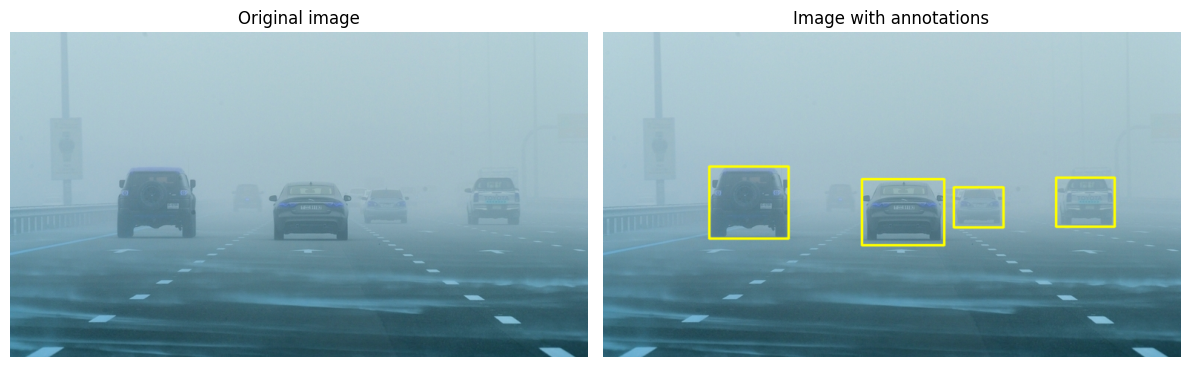

In [84]:
# Show sample image with bounding box annotation
import numpy as np

image_copy = image.copy()
fig, axis = plt.subplots(1, 2, figsize = (12, 4))
axis[0].imshow(image)
axis[0].set_title("Original image")
axis[0].axis("off")

red_color = (255, 255, 0)  # Color for the outlines of bounding box

for k in range(len(annotations)):
    bounding_box = np.asarray(annotations[k]["bbox"], dtype=np.int32)
    x1 = bounding_box[0]
    y1 = bounding_box[1]
    x2 = x1 + bounding_box[2] 
    y2 = y1 + bounding_box[3]
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), red_color, 2, lineType=cv2.LINE_AA)

axis[1].imshow(image_copy)
axis[1].set_title("Image with annotations")
axis[1].axis("off")

fig.tight_layout()
plt.show()